# Predicting key factors of USA health insurance cost

The dataset can be obtained from https://www.kaggle.com/mirichoi0218/insurance
    
To handle the data (a table in csv format), we will use the pandas library for Python. 
Useful tutorials can be found at https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

In [2]:
!pip install pandas
!pip install scikit-learn

You should consider upgrading via the 'D:\Machine_Learning_Course\M2FluidsSolids-MachineLearning\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Machine_Learning_Course\M2FluidsSolids-MachineLearning\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Introduction to `pandas`

### Importing the database

In [3]:
# Importing the csv data
data = pd.read_csv("./Data/insurance.csv")

Some information on the imported database can be printed using the commands `head()`, `describe()` and `info()`

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see, the table has 1338 entries (rows) and 7 columns named
- age (int)
- sex (object)
- bmi (float): body mass index
- children (int)
- smoker (object)
- region (object): the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges (float): Individual medical costs billed by health insurance

### Replacing text by numerical data

In [7]:
data = data.replace({'male': 1, 'female': 2, 'no': 0, 'yes': 1})  # for sex and smoker columns
data = data.replace({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3})

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### Splitting the dataset between train and test data

We will split the dataset between the training dataset `train` and the testing dataset `test`.

The goal will be to find the best possible prediction of the medical cost given the other variables (age, sex...). To test how good the prediction is, we wil use the training set. 

In [8]:
train, test = train_test_split(data, test_size=0.2)

### Plotting the data

You can conveniently plot the data with one the following methods. 

<AxesSubplot: xlabel='age', ylabel='charges'>

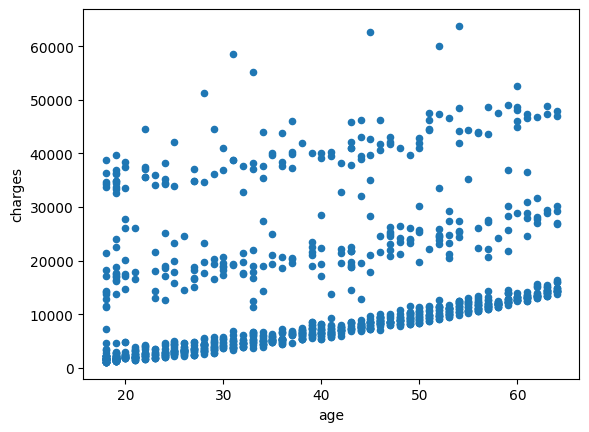

In [9]:
# plot applied to the pandas object
train.plot.scatter('age', 'charges')

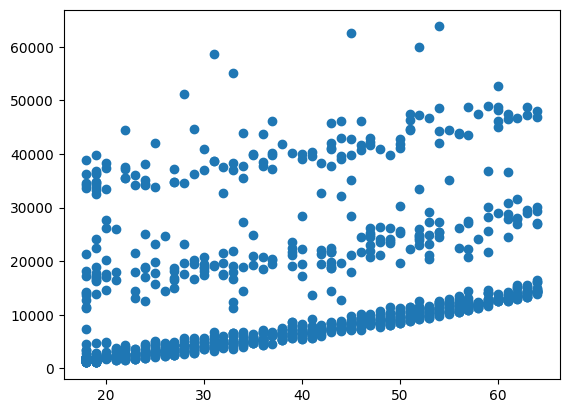

In [10]:
# plot after transforming data into numpy arrays
x = np.array(train["age"])
y = np.array(train["charges"])
plt.scatter(x, y)
plt.show()

Pair-wise correlations can be computed with the function `corr()`. 
Large positive or negative correlations with the column `charges` indicate that the variable is an important factor in determining the price of medical cost. 

In [11]:
train.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.043201,0.124053,0.051664,-0.017630,-0.000744,0.300443
sex,0.043201,1.000000,-0.055024,-0.031582,-0.095705,0.031111,-0.065611
bmi,0.124053,-0.055024,1.000000,0.016007,-0.009078,-0.256329,0.186005
children,0.051664,-0.031582,0.016007,1.000000,0.031761,0.009591,0.082578
smoker,-0.017630,-0.095705,-0.009078,0.031761,1.000000,-0.048703,0.787532
region,-0.000744,0.031111,-0.256329,0.009591,-0.048703,1.000000,-0.041847
charges,0.300443,-0.065611,0.186005,0.082578,0.787532,-0.041847,1.000000


From these values, we see that the three key factors are 
- age
- bmi
- smoker

## Linear regression with one variable

### Plotting

### Question 1
Plot how the medical cost varies as a function of other vaiables and see whether you can spot the correlations evidenced with the function `corr()`. 

In [ ]:
# your answer here

### Gradient descent algorithm

We want to find a linear regression between x = age and y = charges.

The linear regression consists in the hypothesis

$$h_\theta (x) = \theta_0 + \theta_1 x$$

with the cost function

$$J(\theta_0, \theta_1) = \frac{1}{2N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2$$

The iterative procedure of the gradient descent algorithm is then 

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

with $\alpha$ the learning parameter and 

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)x^{(i)}$$

### Question 2
- Complete the following code to implement a gradient descent algorithm
- Check if the learning converges for different values of $\alpha$ (a plot of J as a function of t may help)

In [ ]:
T = 100  # number of steps
alpha = 0.001  # learning parameter
theta0 = 1000.  # initial value
theta1 = 200.  # initial value
N = len(x)  

#for t in range(T):
#    for i in range(N):


In [ ]:
# check the linear regression works
plt.plot(x, y, '.')
plt.plot(x, theta0 + theta1 * x)
plt.show()

### Evaluation of the prediction

In [ ]:
def PredictionError(y, h):
    return 0.5 * np.mean((np.array(y) - np.array(h))**2)

In [ ]:
x_test = np.array(test["age"])
y_test = np.array(test["charges"])
h_test = theta0 + theta1 * x_test

print("Mean error J: %.3e" % PredictionError(y_test, h_test))

### Direct method
The parameters $\theta_0$ and $\theta_1$ can also be obtained by the direct method

$$\theta_1 = {\langle (x - \langle x \rangle) (y - \langle y \rangle)} \,/\, {\langle(x - \langle x \rangle)^2\rangle}$$

$$\theta_0 = \langle y \rangle - \theta_1 \langle x \rangle$$

### Question 3
Complete the code below to calculate $\theta_0$ and $\theta_1$ directly.

In [ ]:
xm = np.mean(x)
ym = np.mean(y)

#theta1direct = ...
#theta0direct = ...

#print("theta_0, theta_1", theta0direct, theta1direct)

plt.plot(x, y, '.')
#plt.plot(x, theta0direct + theta1direct * x)
plt.show()

## Multivariable linear regression

### Rescaled variables

We will first rescale the variables `age`, `bmi`, `smoker` and `charges`such that they have a zero mean and unit standard deviation.

In [ ]:
# Input training variables
x1 = np.array(train["age"])
x2 = np.array(train["bmi"])
x3 = np.array(train["smoker"])
y = np.array(train["charges"])

# testing variables
x1test = np.array(test["age"])
x2test = np.array(test["bmi"])
x3test = np.array(test["smoker"])
ytest = np.array(test["charges"])

In [ ]:
# functions used to rescale variables and come back to scaled variables
def ToRescaled(x, mean=None, std=None):
    if mean is None:
        mean = np.mean(x)
    if std is None:
        std = np.std(x)
    x_ = (x - mean) / std
    return x_, mean, std
    
def FromRescaled(x_, mean, std):
    x = x_ * std + mean 
    return x

In [ ]:
# Rescaled variables
x_1, mean1, std1 = ToRescaled(x1)
x_2, mean2, std2 = ToRescaled(x2)
x_3, mean3, std3 = ToRescaled(x3)
y_ , meany, stdy = ToRescaled(y)

x_1test, _, _ = ToRescaled(x1test, mean1, std1)
x_2test, _, _ = ToRescaled(x2test, mean2, std2)
x_3test, _, _ = ToRescaled(x3test, mean3, std3)
y_test , _, _ = ToRescaled(ytest , meany, stdy)

### Question 4
Plot the rescaled variables to check that they have a zero mean and a unit standard deviation. 

You can plot histograms using the command `plt.hist()` for instance

In [ ]:
# your answer here

### Gradient descent

We first define the matrix X that assembles the input variable $x^{(i)}_j$. 
The first colum of X is full of 1, the remaining columns are the features. 
X is therefore a matrix of size $N\times n$, with $N$ the number of data and $n$ the number of features (including the first constant column).

In [17]:
a = np.ones(shape=(len(y)))
a[np.newaxis, :]

array([[1., 1., 1., ..., 1., 1., 1.]])

In [18]:
X_ = np.concatenate(
    (np.ones(shape=(len(y),1)), 
     x_1[:, np.newaxis], 
     x_2[:, np.newaxis], 
     x_3[:, np.newaxis]), axis=1)

print("X_ is matrix with shape", X_.shape)

NameError: name 'x_1' is not defined

#### Algorithm
The multivariate linear regression consists in the hypothesis

$$h_\theta (x) = \theta \cdot x$$

with $\theta = [\theta_0, \cdots \theta_n]^T$ and $x=[x_0, x_1, \cdots x_n]$, with $x_0=1$

with the cost function

$$J(\theta) = \frac{1}{2N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2$$

The iterative procedure of the gradient descent algorithm is then 

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

with $\alpha$ the learning parameter and 

$$\frac{\partial J}{\partial \theta_j} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)x_j^{(i)}$$

### Question 5
- Complete the following code to implement a gradient descent algorithm
- Check if the learning converges for different values of $\alpha$ (a plot of J as a function of t may help)

In [ ]:
T = 100  # number of steps
alpha = 0.1  # learning parameter
N = X_.shape[0]  # number of data points (1070 here)
M = X_.shape[1]  # number of features/variables (4 here)
theta = np.random.rand(M)

#for t in range(T):
#    for i range(N):

In [ ]:
h_ = np.sum(theta[np.newaxis, :] * X_, axis=1)
plt.plot(x_1, y_, '.', label='data')
plt.plot(x_1, h_, '.', label='prediction')
plt.xlabel('age (rescaled)')
plt.legend()
plt.show

### Evaluation of the prediction

In [ ]:
X_test = np.concatenate(
    (np.ones(shape=(len(ytest),1)), 
     x_1test[:, np.newaxis], 
     x_2test[:, np.newaxis], 
     x_3test[:, np.newaxis]), axis=1)

h_test = np.sum(theta[np.newaxis, :] * X_test, axis=1)
htest = FromRescaled(h_test, meany, stdy)

print("Mean error J: %.3e" % PredictionError(ytest, htest))

### Direct method

The normal equation gives

$$\theta = \left( X^T X \right)^{-1} X^T y$$

which can be implemented as follows

In [ ]:
XTXinv = np.linalg.inv(np.transpose(X_).dot(X_))
thetadirect = XTXinv.dot(np.transpose(X_).dot(y_))

### Question 6
- Compare the the parameters $\theta$ obtained from the gradient descent algorithm and the direct method
- Compare and comment the prediction error for the different methods

### Question 7
Complete the following code to compare the values of the medical cost with the prediction in the space (`age`, `bmi`, `charges`), by identifying smokers with different colors.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(x1[x3<0.5], x2[x3<0.5], y[x3<0.5] / 1000, label='data non smokers')
ax.scatter(x1[x3>0.5], x2[x3>0.5], y[x3>0.5] / 1000, label='data smokers')
# ...

ax.set_xlabel('age')
ax.set_ylabel('BMI')
ax.set_zlabel('cost (k$)')
plt.legend()
plt.show()